# Problem Statement - Credit Risk Analysis using Supervised Algorithm Logistic Regression

Credit scoring is perhaps one of the most "classic" applications for predictive modeling, to predict whether 
or not credit extended to an applicant will likely result in profit or losses for the lending institution. 
There are many variations and complexities regarding how exactly credit is extended to individuals, businesses, 
and other organizations for various purposes (purchasing equipment, real estate, consumer items, and so on), 
and using various methods of credit (credit card, loan, delayed payment plan). But in all cases, a lender provides money 
to an individual or institution, and expects to be paid back in time with interest commensurate with the risk of default.
Credit scoring is the set of decision models and their underlying techniques that aid lenders in the granting of consumer credit. 
These techniques determine who will get credit, how much credit they should get, and what operational strategies will enhance
the profitability of the borrowers to the lenders. Further, they help to assess the risk in lending. Credit scoring is a 
dependable assessment of a person’s credit worthiness since it is based on actual data.

A lender commonly makes two types of decisions: first, whether to grant credit to a new applicant, and second, 
how to deal with existing applicants, including whether to increase their credit limits. In both cases, 
whatever the techniques used, it is critical that there is a large sample of previous customers with their 
application details, behavioral patterns, and subsequent credit history available. Most of the techniques use 
this sample to identify the connection between the characteristics of the consumers (annual income, age, number of years in employment with their current employer, etc.) 
and their subsequent history.

Typical application areas in the consumer market include: 
credit cards,
auto loans,
home mortgages, 
home equity loans, 
mail catalog orders, 
and a wide variety of personal loan products.

One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)

## Data Available 

The dataset Bankloans.csv contains the credit details about credit borrowers:

Data Description:

- age - Age of Customer
- ed - Eductation level of customer
- employ: Tenure with current employer (in years)
- address: Number of years in same address
- income: Customer Income
- debtinc: Debt to income ratio
- creddebt: Credit to Debt ratio
- othdebt: Other debts
- default: Customer defaulted in the past (1= defaulted, 0=Never defaulted)

## What is Logistic regression ?

Logistic Regression is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. It  is also called Logit Regression. 

## How does Logistic Regression work?

Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equationThis equation can be represented as as below: 

(z = beta_0 + beta_1 * x1)
                           
Here, the coefficients beta_0 and beta_1 are the parameters of the model. The predicted response value is given by the above equations and is denoted by z. This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1 using sigmoid function. 

Sigmoid function can be used to map predicted values to probability values. It has an S-shaped curve called sigmoid curve. It can be represented graphically as below:

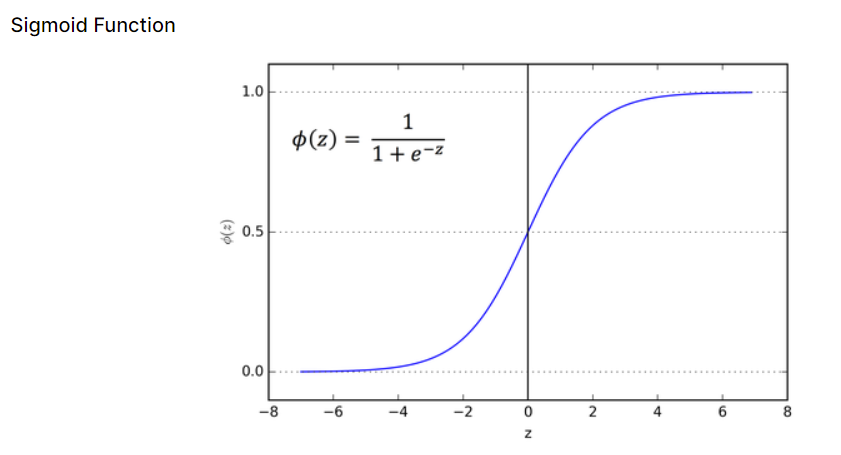

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.

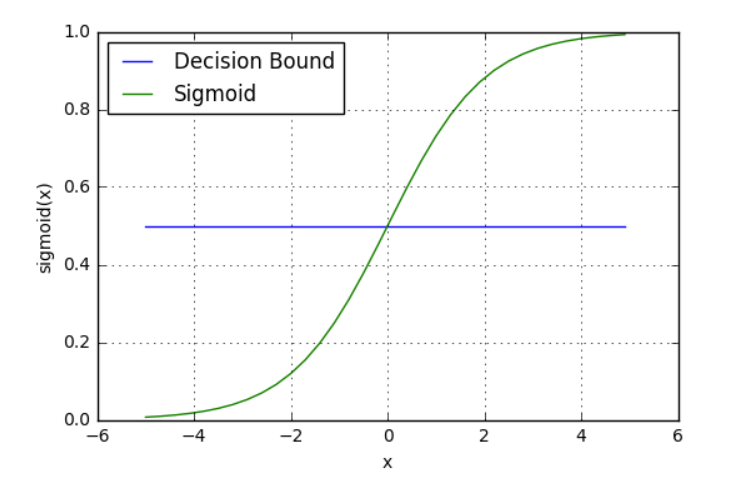

## Logistic Regression makes several assumptions

The Logistic Regression model requires several key assumptions. 

- Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

- It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

- It requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

- It assumes linearity of independent variables and log odds.

- The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from patsy import dmatrices
import warnings 
warnings.filterwarnings("ignore")


<Figure size 720x540 with 0 Axes>

### Load the data 

In [2]:
loans=pd.read_csv('bankloans.csv')

### Exploratory data analysis

In [3]:
loans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
len(loans)

850

In [5]:
loans.sum()

age         29775.000000
ed           1454.000000
employ       7281.000000
address      7116.000000
income      39674.000000
debtinc      8645.900000
creddebt     1340.284021
othdebt      2616.970979
default       183.000000
dtype: float64

In [6]:
loans.mean()

age         35.029412
ed           1.710588
employ       8.565882
address      8.371765
income      46.675294
debtinc     10.171647
creddebt     1.576805
othdebt      3.078789
default      0.261429
dtype: float64

In [7]:
loans.std()

age          8.041432
ed           0.927784
employ       6.777884
address      6.895016
income      38.543054
debtinc      6.719441
creddebt     2.125840
othdebt      3.398803
default      0.439727
dtype: float64

In [8]:
loans.median()

age         34.000000
ed           1.000000
employ       7.000000
address      7.000000
income      35.000000
debtinc      8.700000
creddebt     0.885091
othdebt      2.003243
default      0.000000
dtype: float64

In [9]:
#column-wise sum of null values
loans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

There are missing values for the dependent variable - Default. These are the new customers 
for whom we need to evaluate if we need to provide loans or not. Hence we will be building the 
model with existing customers only.

In [10]:
loans_existing = loans[loans.default.isnull()==0] #choose rows, where default is 0, model will be trained on existing customers only
loans_new = loans[loans.default.isnull()==1]  #choose rows, where default is 1

In [11]:
#impute the missing values with mean 
loans_existing = loans_existing.fillna(loans_existing.mean())

In [12]:
#get the numeric column names
numeric_cols = []

for k in dict(loans.dtypes):
    if dict(loans.dtypes)[k] in ['float64','float32','int64','int32']:
        numeric_cols.append(k)
        
        
numeric_cols

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [13]:
categorical_cols = []

for k in dict(loans.dtypes):
    if dict(loans.dtypes)[k] in ['object']:
        categorical_cols.append(k)
        
print(categorical_cols)       

[]


<AxesSubplot:>

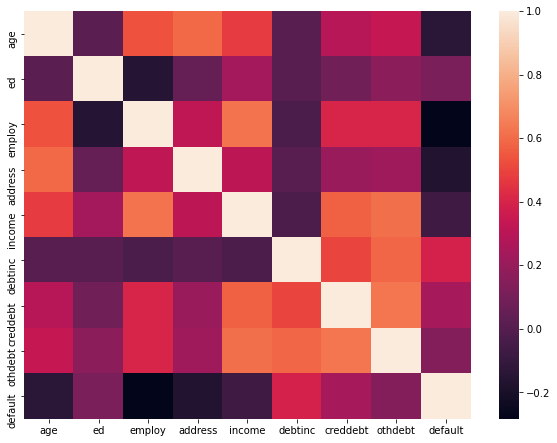

In [14]:
#plot the correlation matrix
sns.heatmap(loans_existing.corr())

The above correlation depicts that there is very strong correlation between default ~ employ,address, income.
Also debtinc shows very strong relationship with income, and is expected as the same is derived variable from income and debt.

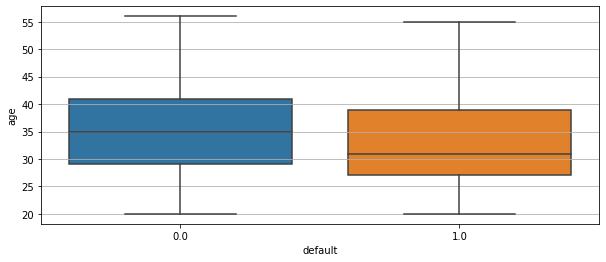

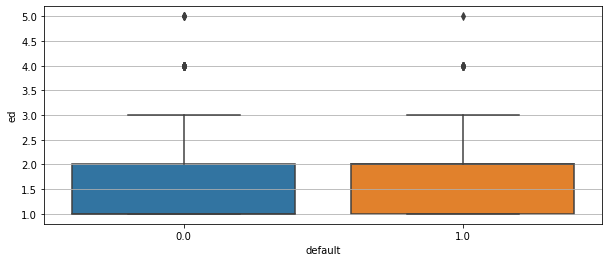

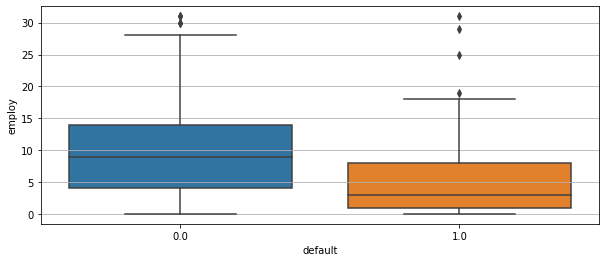

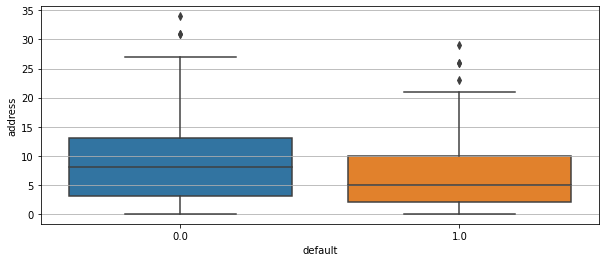

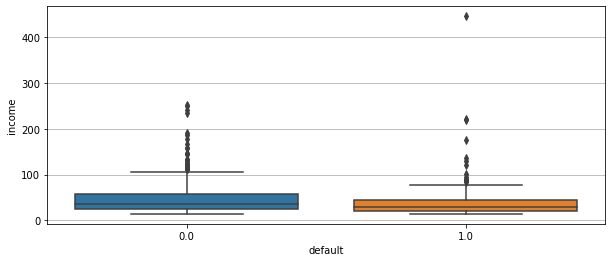

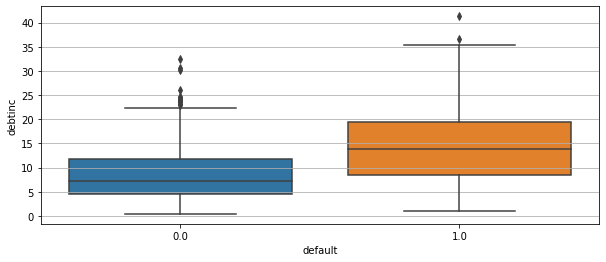

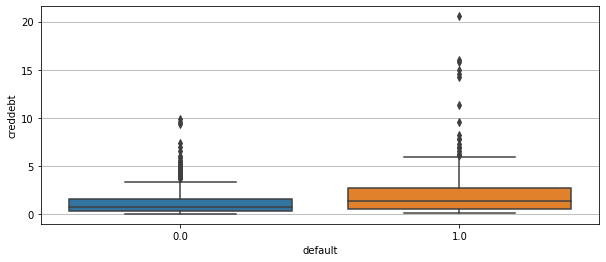

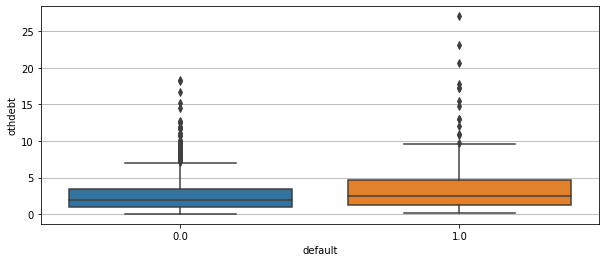

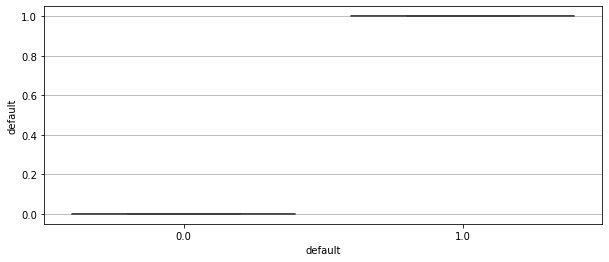

In [15]:
#generate whiskers plot to understand the impact of each independent variable on the dependent variable
for n in numeric_cols:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='default', y=n, data = loans_existing)

- Age - It depicts that people with lower age group tends to default more than with higher age group
- creddebt - People with higher creddebt tends to default more often which is expected in normal circumstances.
- address - This depicts that people who are living at the same location for less duration tends to default more.
- debtinc - People with higher debtinc ratio tends to default more often which is expected in normal circumstances.
- emply - This depicts that people who are employed more recently tends to default more in comparison to the senior people.

These interpretations confirms that some of the basic assumptions are being followed with the given dataset.

This shows that age,ed,income and otherdebt are comparatively insignifincat but can not be ignored on the basis on Ttest.
We need to evaluate them with Somers'D to be sure to remove them from our model

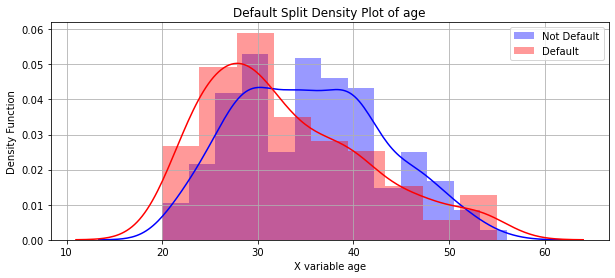

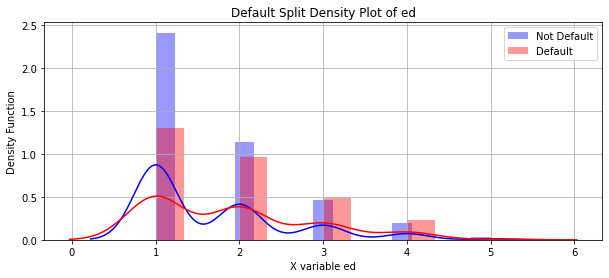

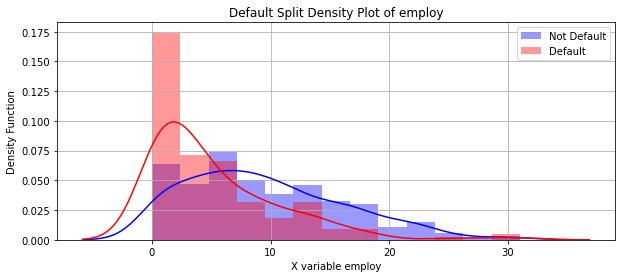

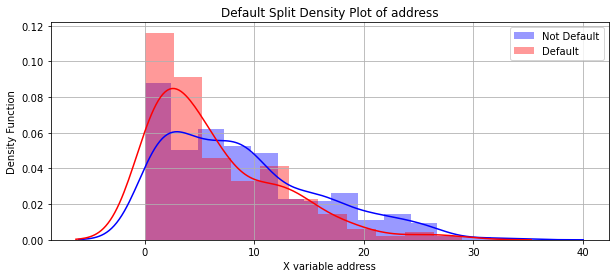

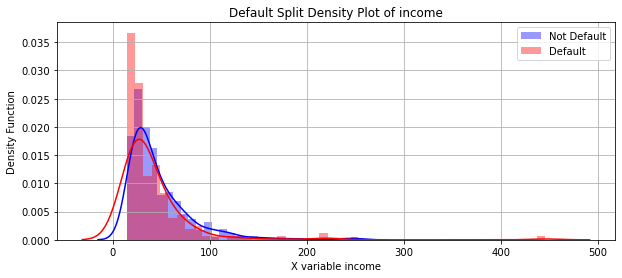

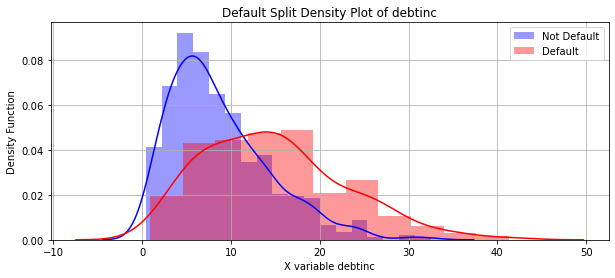

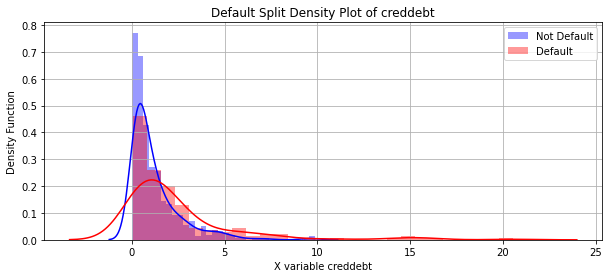

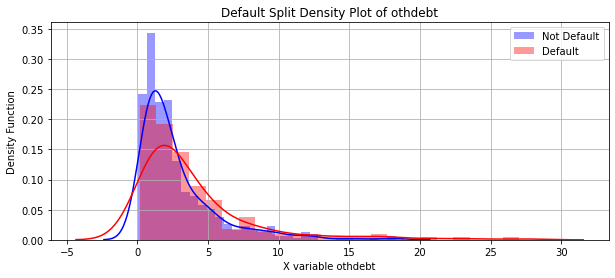

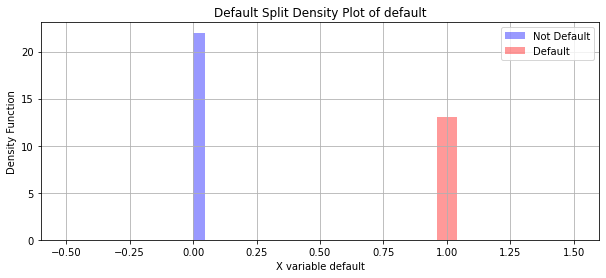

In [16]:
#Visualization
for n in numeric_cols:
    fig,axes = plt.subplots(figsize=(10,4))
    
    sns.distplot(loans_existing[loans_existing['default']==0][n],
                 label='Not Default', 
                 color='b', 
                 hist=True, 
                 norm_hist=False)
    sns.distplot(loans_existing[loans_existing['default']==1][n], 
                 label='Default', 
                 color='r', 
                 hist=True, 
                 norm_hist=False)
    plt.xlabel(str("X variable ") + str(n) )
    plt.ylabel('Density Function')
    plt.title(str('Default Split Density Plot of ')+str(n))
    plt.legend()

In [17]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [18]:
calc_vif(loans_existing)

,variables,VIF
0,age,16.968008
1,ed,4.997813
2,employ,6.207692
3,address,3.621080
4,income,10.508580
5,debtinc,9.147174
6,creddebt,3.853449
7,othdebt,6.485193
8,default,1.896906


- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity,  have a high VIF value, meaning they can be predicted by other independent variables in the dataset.


### Build the Logistic Regression model

In [19]:
train_cols = loans_existing.columns.difference(['default'])
x = loans_existing[train_cols]
y = loans_existing['default']

In [20]:
#split the data into train and test
train_x,test_x, train_y ,test_y = train_test_split(x,y, test_size=0.3, random_state=42)

In [21]:
#define the model
model = LogisticRegression(max_iter=1000)

In [22]:
#fit the model 
model.fit(train_x,train_y)

LogisticRegression(max_iter=1000)

### Make the predictions

In [23]:
#make the predictions for the test set
preds_y = model.predict(test_x)
print(preds_y)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]


### Plot the confusion Matrix 

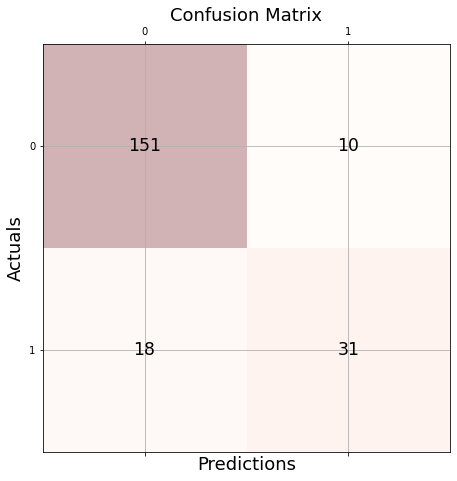

In [24]:
cm = confusion_matrix(test_y, preds_y) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, 
                y=i,
                s=cm[i, j], 
                va='center', 
                ha='center', 
                size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.show()

### Evaluate the performance of model

In [25]:
def performance(test_y, preds_y):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(test_y, preds_y).ravel()
    fpr = round(fp  / (fp + tn),2)*100
    tpr= round(tp / (tp+fn),2)*100
    print(tpr,'% of the positive values have been correctly identified, and ',fpr,'% of the negatives.')
    pass

performance(test_y, preds_y)

63.0 % of the positive values have been correctly identified, and  6.0 % of the negatives.


In [26]:
#print the auc score 
auc_score = metrics.roc_auc_score( test_y, preds_y  )
round( float( auc_score ), 2 )

0.79

Based on a rough classifying system, AUC can be interpreted as follows: 
- 90 -100 = excellent
- 80 - 90 = good
- 70 - 80 = fair
- 60 - 70 = poor
- 50 - 60 = fail

Our auc score of 79% is a fair value.

### Plot the ROC curve 

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. 
ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 
By analogy, the Higher the AUC, the better the model is at classifying correctly.

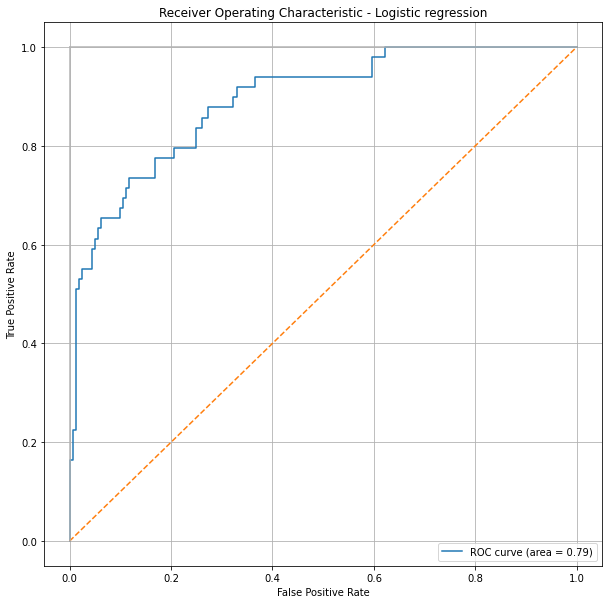

In [27]:
score = model.predict_proba(test_x)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, score)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [28]:
train_accuracy = round(accuracy_score(train_y, model.predict(train_x)),2)
train_accuracy

0.79

In [29]:
test_accuracy = round(accuracy_score(test_y, model.predict(test_x)),2)
test_accuracy

0.87

### Conclusion

This model has been trained to 79% accuracy on the training data and 87% accuracy on the test data. 